In [1]:
import util
from tqdm import tqdm
import numpy as np

train_loader, val_loader, test_loader = util.make_loaders(batch_size = 1, mode = 'test', sample_mode='combine')

pixel_counts = []
values = []
for sample in train_loader:
    #image_count+=1
    #parcel_counts = np.append(parcel_counts, len(sample['masks']))
    #print(sample['masks'].shape)
    #print(sample['values'].shape)


    for mask in sample['masks'][0]:
        pixel_counts.append(np.count_nonzero(mask))
    for value in sample['values'][0]:
        values.append(value)



#print(image_count)
#print(parcel_counts)
#print(np.mean(pixel_counts))
#print(np.mean(values))

/localdisk0/SCRATCH/cgarchbold/envs/py40/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


1915 1532.0 191.5 192


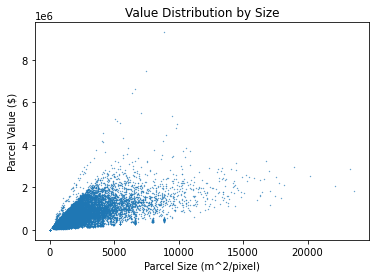

/tmp/ipykernel_875140/3028670231.py:18: RuntimeWarning: invalid value encountered in true_divide
  ratio = np.divide(vals,sizes)


(array([ 31.,  18.,  19.,  44.,  46.,  49.,  29.,  32.,  38.,  35.,  23.,
         43.,  33.,  18.,  24.,  22.,  36.,  29.,  12.,  16.,  33.,  43.,
         25.,  21.,  29.,  40.,  27.,  34.,  29.,  32.,  37.,  28.,  30.,
         24.,  31.,  30.,  32.,  23.,  35.,  32.,  29.,  42.,  37.,  40.,
         36.,  27.,  45.,  32.,  42.,  33.,  37.,  50.,  51.,  50.,  53.,
         42.,  46.,  41.,  41.,  36.,  68.,  62.,  61.,  54.,  32.,  60.,
         56.,  60.,  47.,  47.,  64.,  55.,  58.,  47.,  57.,  64.,  58.,
         52.,  69.,  66.,  64.,  55.,  65.,  55.,  68.,  45.,  67.,  67.,
         83.,  54.,  71.,  65.,  84.,  62.,  61.,  60.,  57.,  62.,  76.,
         72.,  88.,  69.,  61.,  78.,  84.,  64.,  74.,  78.,  80.,  84.,
         84.,  67.,  94.,  87.,  83.,  81.,  76.,  71.,  74.,  81.,  67.,
         71.,  78.,  78.,  92.,  84.,  99.,  86.,  78.,  79.,  67.,  72.,
         90., 109., 104.,  86., 110.,  94., 111.,  98., 101., 101.,  71.,
         96.,  79.,  98., 121., 103., 

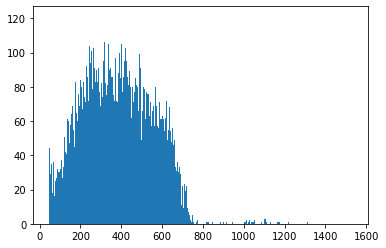

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
#import seaborn as sns

#vals = pd.DataFrame(np.array(values))
vals = np.array(values)
sizes = np.array(pixel_counts)

plt.scatter(sizes,vals, s=0.1)
plt.title("Value Distribution by Size")
plt.xlabel('Parcel Size (m^2/pixel)')
plt.ylabel('Parcel Value ($)')
#plt.set_xlim(0,500000)
#plt.set_ylim(0,500000)
plt.savefig('/u/amo-d0/grad/cgar/Projects/disaggregation/Plots/value_dist.jpg')
plt.show()

ratio = np.divide(vals,sizes)
plt.hist(ratio, bins=1000)

#ax = sns.kdeplot(x = vals, y = sizes,
#     fill= True, thresh=0, levels =10,cmap="mako")
#ax.set(xlabel = "True Values", ylabel = "Estimated Value", title= "Prediction Density Plot")
#plt.savefig(density_pth)
#plt.show()

/tmp/ipykernel_875140/335458691.py:1: RuntimeWarning: invalid value encountered in true_divide
  avg = vals/sizes


nan


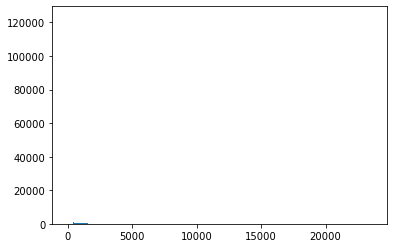

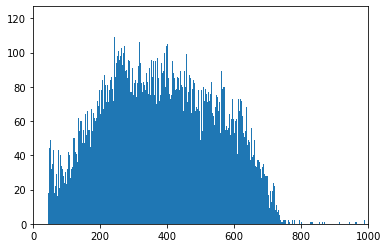

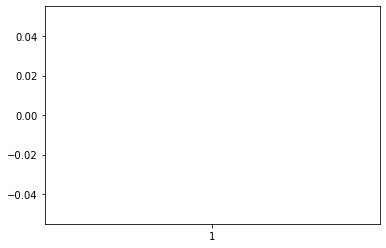

In [3]:
avg = vals/sizes
avg.mean()
print(avg.mean())

plt.hist(sizes,bins = 1000)
plt.show()
plt.hist(avg,bins=1000)
plt.xlim(0,1000)
plt.show()
plt.boxplot(avg)
plt.show()

In [4]:
ds = util.make_dataset('train', sample_mode='')

pixel_counts_2 = []
values_2 = []
for sample in tqdm(ds):


    for mask in sample['masks']:
        pixel_counts_2.append(np.count_nonzero(mask))
    for value in sample['values']:
        values_2.append(value)

100%|██████████| 1915/1915 [07:20<00:00,  4.35it/s]


FileNotFoundError: [Errno 2] No such file or directory: '/u/eag-d1/data/Hennepin/compiled_302x302_gsd1_COMBINEDT/imgs/1915.png'

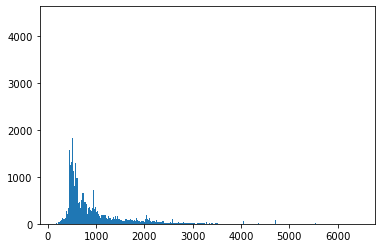

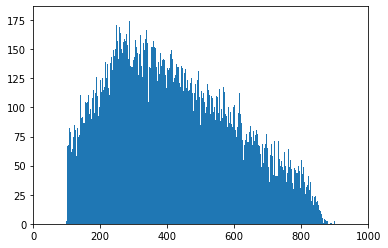

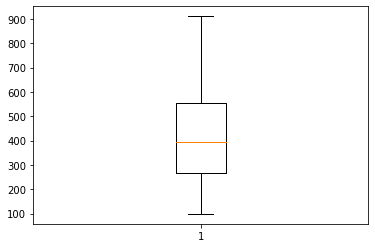

In [22]:
sizes_2 = np.array(pixel_counts_2)
vals_2 = np.array(values_2)
avg_2 = vals_2/sizes_2


plt.hist(sizes_2,bins = 1000)
plt.show()
plt.hist(avg_2,bins=1000)
plt.xlim(0,1000)
plt.show()
plt.boxplot(avg_2)
plt.show()